In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import itertools as itertools
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from copy import deepcopy
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from bs4 import BeautifulSoup
import requests
import time


# Random Forest 

In [93]:
final_df = pd.read_csv('data.csv')
final_reference = pd.read_csv('reference.csv')

Worker1_seasons.csv
Worker2_seasons.csv
Worker3_seasons.csv
Worker4_seasons.csv
Worker6_seasons.csv
Worker7_seasons.csv
Rosa_seasons.csv
Rosa1_seasons.csv
Rosa2_seasons.csv
Rosa3_seasons.csv
Charles_seasons.csv


,Unnamed: 0,awayteam,hometeam,possession,awayscore,homescore,total_time,win,game_id
0,0,Phoenix,Boston,1,0,2,0.0,0,0
1,1,Phoenix,Boston,0,0,2,52.0,0,0
2,2,Phoenix,Boston,1,0,2,132.0,0,0
3,3,Phoenix,Boston,0,0,2,136.0,0,0
4,4,Phoenix,Boston,0,0,4,172.0,0,0


In [267]:
final_df = pd.concat(frames, ignore_index = True)
final_reference = pd.concat(references, ignore_index = True)
final_df.to_csv("data.csv", sep = ',')
final_reference.to_csv("reference.csv", sep = ',')
final_df.shape

(932039, 9)

In [95]:
len(final_df['game_id'].unique())

1217

In [112]:
final_df['game_id'].unique().max()

3591

In [268]:
#taking out test games from the beginning, middle, and end of the season
test_games1 = final_df.loc[final_df['game_id'] >= 3500]
final_df1 = final_df.loc[final_df['game_id'] < 3500]

In [101]:
test_games1.shape

(4948, 9)

In [269]:
msk = np.random.rand(len(final_df)) < 0.8
df_train = final_df[msk]
df_test = final_df[~msk]

In [270]:
df_train.columns

Index(['Unnamed: 0', 'awayteam', 'hometeam', 'possession', 'awayscore',
       'homescore', 'total_time', 'win', 'game_id'],
      dtype='object')

In [271]:
# splitting training and testing
df_train1 = df_train.drop(['awayteam', 'hometeam', 'Unnamed: 0', 'game_id'], axis = 1)
df_test1 = df_test.drop(['awayteam', 'hometeam', 'Unnamed: 0', 'game_id'], axis = 1)

In [272]:
# splitting into x and y training and testing
x_train = df_train1.loc[:, df_train1.columns != 'win']
y_train = df_train1['win']
x_test = df_test1.loc[:, df_test1.columns != 'win']
y_test = df_test1['win']
test_games_x1 = test_games1.loc[:, test_games1.columns != 'win']

In [273]:
x_train.columns

Index(['possession', 'awayscore', 'homescore', 'total_time'], dtype='object')

In [137]:
#testing for the best combination of depth and number of trees
tree_counts2 = [2**x for x in range(1, 5)]
depths = [2, 4, 6, 8, 10]
combinations = list(itertools.product(depths, tree_counts2))
train_scores = dict()
test_scores = dict()
for d, c in combinations:
    rand_forest = RandomForestClassifier(n_estimators = c, max_features = 2, max_depth = d, random_state = 1)
    rand_forest.fit(x_train, y_train)
    tr_pred = rand_forest.predict(x_train)
    tst_pred = rand_forest.predict(x_test)
    train_scores[str(c) + " " + str(d)] = metrics.accuracy_score(y_train, tr_pred)
    test_scores[str(c) + " " + str(d)] = metrics.accuracy_score(y_test, tst_pred)
test_scores

{'16 10': 0.738513744968742,
 '16 2': 0.63408302646227632,
 '16 4': 0.68094330735634157,
 '16 6': 0.70363749250663699,
 '16 8': 0.71804080671405324,
 '2 10': 0.73992677913847738,
 '2 2': 0.61147447974651026,
 '2 4': 0.68219041705917616,
 '2 6': 0.68839385116040075,
 '2 8': 0.72591419028860149,
 '4 10': 0.74353965059518712,
 '4 2': 0.62110880363106957,
 '4 4': 0.68001198938083407,
 '4 6': 0.69898090262909995,
 '4 8': 0.72039051126145415,
 '8 10': 0.7411096600154149,
 '8 2': 0.63567268990322856,
 '8 4': 0.68707180782735289,
 '8 6': 0.69892737860751908,
 '8 8': 0.7161032371328252}

In [44]:
def get_rates(confusion_matrix):
    rates = dict()
    TN = confusion_matrix[0][0]
    FN = confusion_matrix[0][1]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[1][0]
    rates["True Positive Rate"] = (TP/(TP+FN))
    rates["False Positive Rate"] = (FP/(FP+TN))
    rates["True Negative Rate"] = (TN/(FP+TN))
    return rates

In [275]:
rand_forest = RandomForestClassifier(n_estimators = 15, max_features = 2, max_depth = 3, random_state = 1)
rand_forest.fit(x_train, y_train)
con_matrix = metrics.confusion_matrix(y_test, rand_forest.predict(x_test))
tst_pred = rand_forest.predict(x_test)
print(get_rates(con_matrix), metrics.accuracy_score(y_test, tst_pred))

{'True Positive Rate': 0.88534744177043678, 'False Positive Rate': 0.35853627064564564, 'True Negative Rate': 0.64146372935435436} 0.661786607167


In [276]:
log_regr = LogisticRegression(random_state = 1)
log_regr.fit(x_train, y_train)
con_matrix = metrics.confusion_matrix(y_test, log_regr.predict(x_test))
tst_pred = log_regr.predict(x_test)
print(get_rates(con_matrix), metrics.accuracy_score(y_test, tst_pred))

{'True Positive Rate': 0.70543388893041337, 'False Positive Rate': 0.23225020990764064, 'True Negative Rate': 0.76774979009235933} 0.745337240248


In [131]:
test_games1['game_id'].unique()

array([3501, 3510, 3519, 3528, 3537, 3546, 3555, 3564, 3573, 3582, 3591], dtype=int64)

In [132]:
test_games1.loc[test_games1['game_id'] == 3501]

,Unnamed: 0,awayteam,hometeam,possession,awayscore,homescore,total_time,win,game_id
860894,174209,Toronto,Philadelphia,1,0,2,0.0,1,3501
860895,174210,Toronto,Philadelphia,0,0,2,60.0,1,3501
860896,174211,Toronto,Philadelphia,1,2,2,140.0,1,3501
860897,174212,Toronto,Philadelphia,0,2,4,192.0,1,3501
860898,174213,Toronto,Philadelphia,1,4,4,244.0,1,3501
860899,174214,Toronto,Philadelphia,0,4,4,300.0,1,3501
860900,174215,Toronto,Philadelphia,0,4,4,304.0,1,3501
860901,174216,Toronto,Philadelphia,0,4,4,316.0,1,3501
860902,174217,Toronto,Philadelphia,1,4,4,380.0,1,3501
860903,174218,Toronto,Philadelphia,1,4,4,384.0,1,3501


In [48]:
def fix_time(l1):
    df = pd.DataFrame(data = l1, columns = ['Time', 'Probability'])
    df1 = df.groupby('Time', as_index = False)['Probability'].mean()
    df2 = df1.loc[df1['Time'] <= 2880]
    return df2

In [126]:
def graph_game(game_id, model, plot):
    game = test_games_x1.loc[test_games_x1['game_id'] == game_id]
    game1 = game.drop(['awayteam', 'hometeam', 'Unnamed: 0', 'game_id'], axis = 1)
    game1 = game1.sort_values(by = 'total_time', ascending = True)
    wps = model.predict_proba(game1)
    relevant_wps = [i[0] for i in wps]
    sm = smooth(relevant_wps, 10)
    l1 = list(zip(game1['total_time'], sm))
    n_df = fix_time(l1)
    if plot == True:
        fig = plt.figure(figsize=(20, 10))
        plt.plot(n_df['Time'], n_df['Probability'])
        plt.xlabel('Time (Min Played)')
        plt.ylabel('Probability that '+ city + ' wins')
        plt.show()
    return n_df

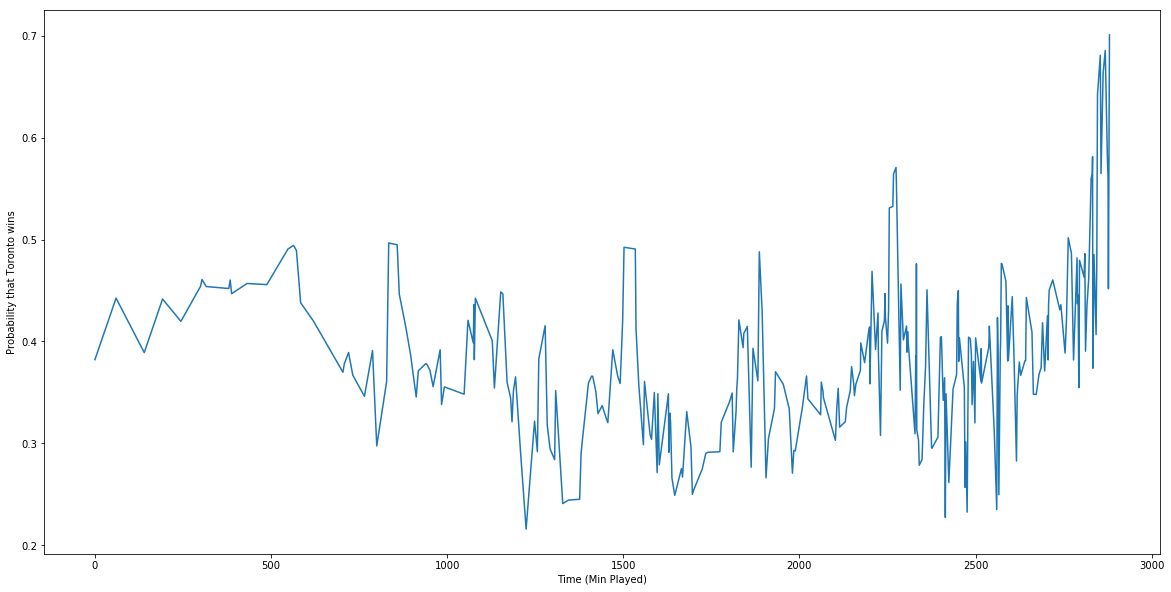

In [279]:
d = graph_game(3501, 'Toronto', log_regr, True)

In [57]:
c[-5:]

,Time,Probability
278,2874.0,0.728809
279,2876.0,0.804879
280,2877.0,0.693115
281,2878.0,0.613943
282,2880.0,0.582454


In [125]:
def smooth(l1, k):
    l3 = []
    sz = len(l1)
    for i, v in enumerate(l1):
        l2 = []
        l2.append(v)
        while len(l2) < k:
            if (i - 1) > 0 and len(l2) < k:
                l2.append(l1[i-1])
            if (i + 1) < sz and len(l2) < k:
                l2.append(l1[i+1])
        l3.append(np.mean(l2))
        #print(np.mean(l2))
    return l3

In [146]:
len(test_games1['game_id'].unique())

11

In [149]:
dfs = []
for gid in test_games1['game_id'].unique():
    game = test_games1.loc[test_games1['game_id'] == gid]
    team = game.iloc[1]['hometeam']
    d = graph_game(gid, team, log_regr, False)
    d['game_id'] = (gid)
    dfs.append(d)
result_df = pd.concat(dfs, ignore_index = True)

In [256]:
def ensemble(log_df, rand_df):
    log_df1 = log_df.groupby('Time', as_index = False)['Probability'].mean()
    log_df2 = log_df1.loc[log_df1['Time'] <= 2880]
    rand_df1 = rand_df.groupby('Time', as_index = False)['Probability'].mean()
    rand_df2 = rand_df1.loc[rand_df1['Time'] <= 2880]
    e_df = rand_df2.merge(log_df2, on = "Time", suffixes = ('_rand', '_log'))
    final = []
    ln = e_df.shape[0]
    for i, row in e_df.iterrows():
        r = row['Probability_rand']
        l = row['Probability_log']
        avg = ((r + l)/2)
        if row['Time'] < 2000:
            final.append(l)
        else:
            final.append(avg)
    df = e_df.drop(['Probability_rand', 'Probability_log'], axis = 1)
    df['Probability'] = final
    return df
    

In [265]:
s_df = ensemble(d, c)

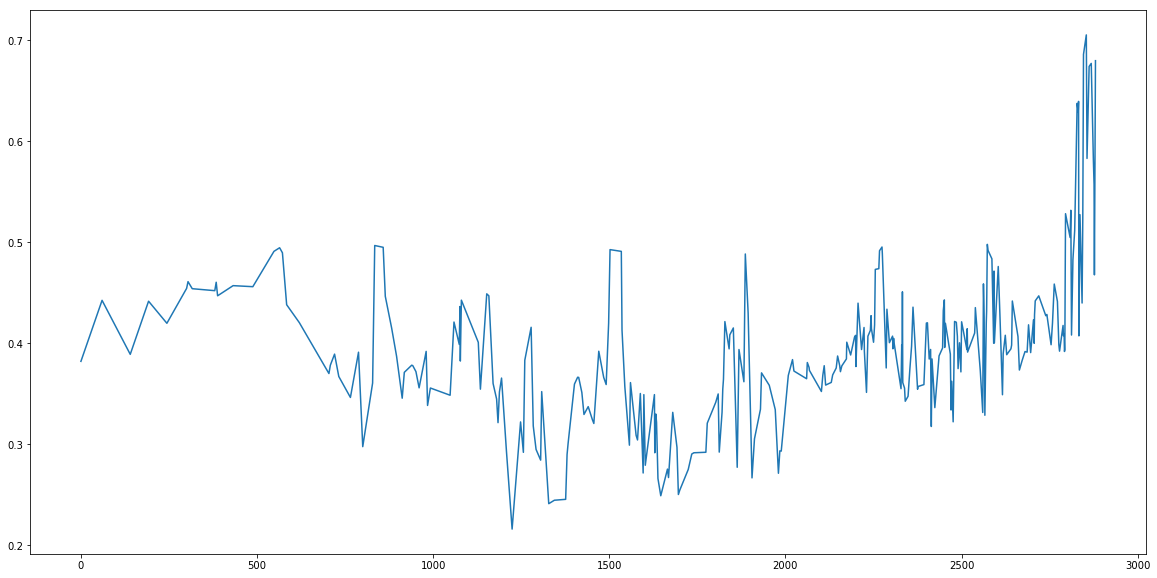

In [266]:
fig = plt.figure(figsize=(20, 10))
plt.plot(s_df['Time'], s_df['Probability'])
plt.show()